In [16]:
from models import clip_builder
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from datasets_tcl.builder import build_text_transform
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange

In [2]:
name = 'ViT-B/16'

image_encoder = clip_builder.get_clip_imgenc(name, training=False).eval()
text_encoder = clip_builder.get_clip_textenc(name, training=False).eval()

In [3]:
image_dir = "/workspace/Dataset/VOC_sample/JPEGImages/"

image_names= os.listdir(image_dir)

idx = 13
img_name = image_names[idx]

img = Image.open(os.path.join(image_dir, img_name)).convert("RGB")

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGENET_DEFAULT_MEAN, std=IMAGENET_DEFAULT_STD)
])

tokenizer = build_text_transform()

In [5]:
img_t = transform(img)[None, :, :, :]

img_emb = image_encoder(img_t, spatial=True)

# img_emb = F.normalize(img_emb, dim=-1)
text = ['a photo of a computer.']
text_emb = text_encoder(tokenizer(text))
# text_emb = F.normalize(text_emb, dim=-1)


In [6]:
local_emb, global_emb = img_emb[:,1:], img_emb[:,0]

In [14]:
img = np.array(img.resize((224, 224)))

In [22]:
sim = local_emb @ rearrange(text_emb, 'b c -> c b').squeeze(-1)
sim = F.normalize(sim, dim=-1)

In [24]:
torch.argmax(sim)

tensor(90)

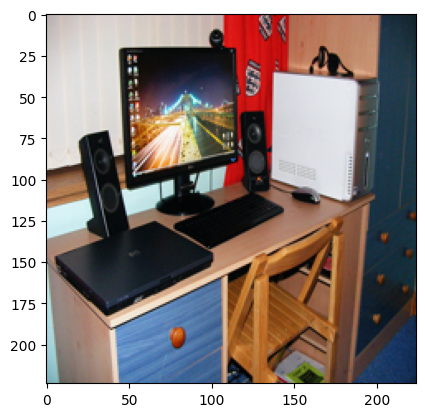

In [26]:
plt.imshow(img)